In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df=pd.DataFrame()

In [ ]:
df["X1"]=[1,2,3,4,5,6,6,7,9,9]
df["X2"]=[5,3,6,6,8,2,3,1,3,5]
df["label"]=[1,1,0,1,0,1,0,1,0,0]

In [ ]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,6,1
4,5,8,0
5,6,2,1
6,6,3,0
7,7,1,1
8,9,3,0
9,9,5,0


<Axes: xlabel='X1', ylabel='X2'>

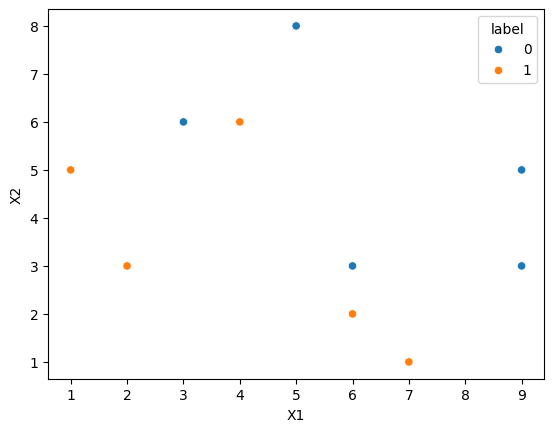

In [ ]:
sns.scatterplot(x=df["X1"],y=df['X2'],hue=df["label"])

In [ ]:
df["weights"]=1/df.shape[0]

In [ ]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,6,1,0.1
4,5,8,0,0.1
5,6,2,1,0.1
6,6,3,0,0.1
7,7,1,1,0.1
8,9,3,0,0.1
9,9,5,0,0.1


In [ ]:
dt1=DecisionTreeClassifier(max_depth=1)

In [ ]:
X=df.iloc[:,0:2].values
y=df.iloc[:,2].values

In [ ]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [ ]:
df["y_pred"]=dt1.predict(X)

In [ ]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,6,1,0.1,0
4,5,8,0,0.1,0
5,6,2,1,0.1,0
6,6,3,0,0.1,0
7,7,1,1,0.1,0
8,9,3,0,0.1,0
9,9,5,0,0.1,0


In [ ]:
def calculate_model_weight(error):
  return 0.5*np.log((1-error)/error)

In [ ]:
#calculate model weight
alpha1=calculate_model_weight(0.3)
alpha1

np.float64(0.42364893019360184)

In [32]:
# udpate weight
def update_row_weight(row,alpha=0.423):
  if row["label"] == row["y_pred"]:
    return row["weights"]*np.exp(-alpha)
  else:
    return row["weights"]*np.exp(alpha)

In [33]:
df["updated_weight"]=df.apply(update_row_weight,axis=1)

In [34]:
df

,X1,X2,label,weights,y_pred,updated_weight
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,6,1,0.1,0,0.152653
4,5,8,0,0.1,0,0.065508
5,6,2,1,0.1,0,0.152653
6,6,3,0,0.1,0,0.065508
7,7,1,1,0.1,0,0.152653
8,9,3,0,0.1,0,0.065508
9,9,5,0,0.1,0,0.065508


In [36]:
df["updated_weight"]

,updated_weight
0,0.065508
1,0.065508
2,0.065508
3,0.152653
4,0.065508
5,0.152653
6,0.065508
7,0.152653
8,0.065508
9,0.065508


In [37]:
df["normalised_weight"]=df["updated_weight"]/df["updated_weight"].sum()

In [38]:
df

,X1,X2,label,weights,y_pred,updated_weight,normalised_weight
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,6,1,0.1,0,0.152653,0.166559
4,5,8,0,0.1,0,0.065508,0.071475
5,6,2,1,0.1,0,0.152653,0.166559
6,6,3,0,0.1,0,0.065508,0.071475
7,7,1,1,0.1,0,0.152653,0.166559
8,9,3,0,0.1,0,0.065508,0.071475
9,9,5,0,0.1,0,0.065508,0.071475


In [42]:
df['cumsum_upper'] = np.cumsum(df['normalised_weight'])

In [44]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalised_weight']

In [46]:
df[['X1','X2','label','weights','y_pred','updated_weight','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weight,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.142950,0.214425
3,4,6,1,0.1,0,0.152653,0.214425,0.380983
4,5,8,0,0.1,0,0.065508,0.380983,0.452458
5,6,2,1,0.1,0,0.152653,0.452458,0.619017
6,6,3,0,0.1,0,0.065508,0.619017,0.690492
7,7,1,1,0.1,0,0.152653,0.690492,0.857050
8,9,3,0,0.1,0,0.065508,0.857050,0.928525
9,9,5,0,0.1,0,0.065508,0.928525,1.000000


In [47]:

def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [49]:
index_values=create_new_dataset(df)
index_values

[7, 7, 5, 4, 5, 4, 5, 7, 9, 4]

In [50]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [51]:
second_df

,X1,X2,label,weights
7,7,1,1,0.1
7,7,1,1,0.1
5,6,2,1,0.1
4,5,8,0,0.1
5,6,2,1,0.1
4,5,8,0,0.1
5,6,2,1,0.1
7,7,1,1,0.1
9,9,5,0,0.1
4,5,8,0,0.1


In [52]:

dt2 = DecisionTreeClassifier(max_depth=1)

In [53]:

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [54]:

dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [55]:

second_df['y_pred'] = dt2.predict(X)

In [56]:

second_df

,X1,X2,label,weights,y_pred
7,7,1,1,0.1,1
7,7,1,1,0.1,1
5,6,2,1,0.1,1
4,5,8,0,0.1,0
5,6,2,1,0.1,1
4,5,8,0,0.1,0
5,6,2,1,0.1,1
7,7,1,1,0.1,1
9,9,5,0,0.1,0
4,5,8,0,0.1,0


In [57]:
alpha2 = calculate_model_weight(0.1)


In [58]:

alpha2

np.float64(1.0986122886681098)

In [61]:

# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [60]:

second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [62]:

second_df

,X1,X2,label,weights,y_pred,updated_weights
7,7,1,1,0.1,1,0.033622
7,7,1,1,0.1,1,0.033622
5,6,2,1,0.1,1,0.033622
4,5,8,0,0.1,0,0.033622
5,6,2,1,0.1,1,0.033622
4,5,8,0,0.1,0,0.033622
5,6,2,1,0.1,1,0.033622
7,7,1,1,0.1,1,0.033622
9,9,5,0,0.1,0,0.033622
4,5,8,0,0.1,0,0.033622


In [63]:

second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()


In [64]:

second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
7,7,1,1,0.1,1,0.033622,0.1
7,7,1,1,0.1,1,0.033622,0.1
5,6,2,1,0.1,1,0.033622,0.1
4,5,8,0,0.1,0,0.033622,0.1
5,6,2,1,0.1,1,0.033622,0.1
4,5,8,0,0.1,0,0.033622,0.1
5,6,2,1,0.1,1,0.033622,0.1
7,7,1,1,0.1,1,0.033622,0.1
9,9,5,0,0.1,0,0.033622,0.1
4,5,8,0,0.1,0,0.033622,0.1


In [65]:

second_df['nomalized_weights'].sum()

np.float64(0.9999999999999999)

In [66]:

second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [67]:

second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [68]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
7,7,1,1,0.1,1,0.1,0.0,0.1
7,7,1,1,0.1,1,0.1,0.1,0.2
5,6,2,1,0.1,1,0.1,0.2,0.3
4,5,8,0,0.1,0,0.1,0.3,0.4
5,6,2,1,0.1,1,0.1,0.4,0.5
4,5,8,0,0.1,0,0.1,0.5,0.6
5,6,2,1,0.1,1,0.1,0.6,0.7
7,7,1,1,0.1,1,0.1,0.7,0.8
9,9,5,0,0.1,0,0.1,0.8,0.9
4,5,8,0,0.1,0,0.1,0.9,1.0


In [69]:

index_values = create_new_dataset(second_df)

In [70]:

third_df = second_df.iloc[index_values,[0,1,2,3]]

In [71]:

third_df

,X1,X2,label,weights
4,5,8,0,0.1
7,7,1,1,0.1
4,5,8,0,0.1
7,7,1,1,0.1
7,7,1,1,0.1
5,6,2,1,0.1
4,5,8,0,0.1
4,5,8,0,0.1
5,6,2,1,0.1
5,6,2,1,0.1


In [72]:

dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [73]:

third_df['y_pred'] = dt3.predict(X)

In [74]:

third_df

,X1,X2,label,weights,y_pred
4,5,8,0,0.1,1
7,7,1,1,0.1,1
4,5,8,0,0.1,1
7,7,1,1,0.1,0
7,7,1,1,0.1,1
5,6,2,1,0.1,0
4,5,8,0,0.1,1
4,5,8,0,0.1,1
5,6,2,1,0.1,0
5,6,2,1,0.1,0


In [75]:

alpha3 = calculate_model_weight(0.7)
alpha3


np.float64(-0.4236489301936017)

In [76]:

print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


# Prediction

In [77]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [78]:
dt2.predict(query)

array([0])

In [79]:

dt3.predict(query)

array([0])

In [80]:
alpha1*1 + alpha2*(1) + alpha3*(1)

np.float64(1.09861228866811)

In [81]:

np.sign(1.09)

np.float64(1.0)

In [82]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([0])

In [83]:

dt2.predict(query)

array([0])

In [84]:

dt3.predict(query)

array([0])

In [85]:

alpha1*(1) + alpha2*(-1) + alpha3*(-1)

np.float64(-0.2513144282809062)

In [86]:

np.sign(-0.25)

np.float64(-1.0)